Desarrollo de una APP para clasificar las flores IRIS usando SDG --- 43:33 min
===

* 43:33 min | Última modificación: Abril 12, 2021 | [YouTube](https://youtu.be/dnsDd6hXu18)


**Bibliografia.**

* Learning scikit-learn: Machine Learning in Python. R. Garreta, G. Moncecchi. Packt Publishing, 2013.

* Monetizing Machine Learning. M. Amunaategui, M. Roopaei. Apress, 2018.

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Definición del problema

Se desea desarrollar una app que permita la identificación del tipo de flor (virginica, setosa, versicolor) a partir de la medición del tamaño del sépalo y el pétalo.

![assets/iris.jpg](assets/iris.jpg)

Para dearrollar el modelo se tienen 150 medidiciones del ancho y el largo del sépalo y el pétalo para las tres especies de la flor Iris, con 50 mediciones para cada especie. La app debe implementar un clasificador que pronostique la especie de la flor a partir de dichas mediciones.

In [2]:
#
# los datos se encuentran disponibles directamente en scikit-learn
#
from sklearn import datasets
data = datasets.load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Desarrollo del clasificador

### Carga y partición de los datos

In [3]:
#
# Carga de datos.
#   Se verifica la cantidad de datos de la muestra
#
X, y = data.data, data.target
X.shape, y.shape

((150, 4), (150,))

In [4]:
#
# Nombres de las variables independientes
#
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
#
# Nombres de las clases de salida
#
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
#
# Codificación de la clase a la que pertence cada instancia
#
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
#
# Nombre de la clase a la que pertenece cada instancia
#
data.target_names[data.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [8]:
#
# Partición de los datos en conjuntos de entrenamiento y prueba
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=33
)

In [9]:
#
# Dimensiones de las variables del conjunto de entrenamiento
#
X_train.shape, y_train.shape

((112, 4), (112,))

In [10]:
#
# Dimensiones de las variables del conjunto de prueba
#
X_test.shape, y_test.shape

((38, 4), (38,))

### Preprocesamiento

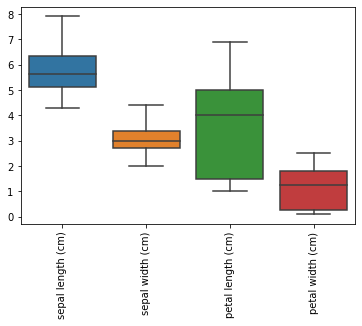

In [11]:
#
# Diagrama de caja y bigote que muestra la distribución 
# de las variables independientes
#
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.boxplot(data=pd.DataFrame(X_train, columns = data.feature_names))
plt.xticks(rotation=90);

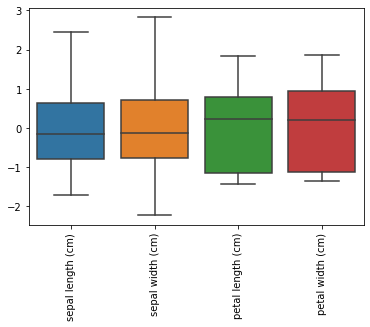

In [12]:
#
# Escalamiento de los datos
#  El StandardScaler remueve la media de los datos y 
#  luego los divide por su desviación estándar
#
from sklearn.preprocessing import StandardScaler

# Crea el preprocesador
scaler = StandardScaler()

# Entrena el preprocesador. Note que se calcula
# unicamente para el conjunto de entrenamiento
scaler.fit(X_train)

# Escala los conjuntos de entrenamiento y prueba
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

# Efecto del StandardScaler
sns.boxplot(data=pd.DataFrame(X_train, columns = data.feature_names))
plt.xticks(rotation=90);

### Creación y entrenamiento del clasificador

In [13]:
from sklearn.linear_model import SGDClassifier

# Crea y parametriza el clasificador
clf = SGDClassifier(max_iter=10, tol=None)

# Entrena el clasificador
clf.fit(X_train, y_train)

# Valores del intercepto de los clasificadores
print(clf.coef_)
print()

# Valores de los coeficientes de los atributos escalados
print(clf.intercept_)

[[ -2.74180812   5.95413393  -5.76887665  -6.98842528]
 [ -8.68565645  -9.52484222  26.02081779 -12.76862443]
 [ -3.81894703  -9.33877553  26.38137258  30.86932658]]

[ 9.99000999e-03 -8.27051030e-01 -5.16766800e+01]


### Métricas de desempeño usando partición de los datos en entrenamiento y validación

In [14]:
from sklearn import metrics

# Pronóstico para el conjunto de entrenamiento
y_train_pred = clf.predict(X_train)

# Precisión para el conjunto de entrenamiento
metrics.accuracy_score(y_train, y_train_pred)

0.8839285714285714

In [15]:
# Precisión para el conjunto de prueba
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7894736842105263

In [16]:
# 
# Métricas de evaluación
#
print(metrics.classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.58      1.00      0.73        11
   virginica       1.00      0.58      0.73        19

    accuracy                           0.79        38
   macro avg       0.86      0.86      0.82        38
weighted avg       0.88      0.79      0.79        38



In [17]:
#
# Matriz de confusión
#
metrics.confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  8, 11]])

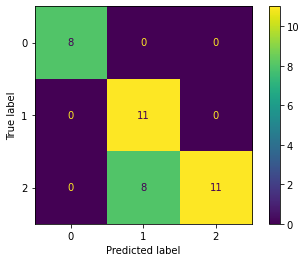

In [18]:
from sklearn.metrics import plot_confusion_matrix

#
# Note que la función computa internamente
# el pronósitco del clasificador
#
plot_confusion_matrix(
    clf,        # clasificador entrenado
    X_test,     # matriz de variables de entrada
    y_test);    # valor real 

**Pregunta.---** ¿Es posible mejorar la distribución de la matriz de confusión usando otras métricas de error?

### Construcción de un pipeline

In [19]:
#
# Esta es la estrategia real para implementar modelos
#   El pipeline empaqueta todas las operaciones requeridas
#   por el clasificador.
#
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_model', SGDClassifier(max_iter=10, tol=None))
])

### Evaluación del desempeño (del pipeline) usando validación cruzada

In [20]:
#
# Computa la precisión usando validación cruzada
#
from sklearn.model_selection import cross_val_score
from scipy.stats import sem
import numpy as np

scores = cross_val_score(
    clf,        # clasificador
    X,          # 
    y,          #
    cv=10)      # Número de particiones para realizar validación cruzada

print(scores)
print("Mean score: {0:.3f} (+/- {1:.3f})".format(np.mean(scores), sem(scores)))

[1.         0.8        0.8        0.93333333 0.93333333 0.73333333
 0.86666667 0.93333333 1.         1.        ]
Mean score: 0.900 (+/- 0.030)


### Almacenamiento y restauración del (pipeline) modelo

In [21]:
#
# Se entrena el modelo definitivo
# 
clf.fit(X, y);  # este es el pipeline

In [22]:
#
# Almacenamiento en disco
#
import pickle

# Abre el archivo en disco modo binario para escritura
with open('clf.pickle', 'wb') as f:
    pickle.dump(clf, f, pickle.HIGHEST_PROTOCOL)

In [23]:
#
# Se verifica que el modelo quedo 
# almacenado en disco
#
!ls *.pickle

clf.pickle


In [24]:
#
# Lectura desde el disco
#
with open('clf.pickle', 'rb') as f:
    new_clf = pickle.load(f)
    
# verificación
new_clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Desarrollo de la APP con GUI usando Flask

Se separa el desarrollo y entrenamiento del clasificador de la aplicación que lo despliega en productivo.

In [25]:
%%writefile Vagrantfile

Vagrant.configure("2") do |config|
  
    config.vm.box = "ubuntu/bionic64"
    
    config.vm.provision "shell", inline: <<-SHELL
      sudo apt-get update
      sudo apt-get install -yq \
        build-essential \
        tree \
        python-dev \
        python3-minimal \
        python3-pip \
        python3-dev \       
        python3-venv
      sudo apt-get update
      pip3 install --upgrade pip 
      pip3 install pandas matplotlib scikit-learn flask
    SHELL

    config.vm.network :forwarded_port, guest: 5000, host: 1234, host_ip: "127.0.0.1"
    
end

Overwriting Vagrantfile


### Funcionalidad

In [26]:
!mkdir -p app
!mkdir -p app/templates
!cp clf.pickle app/

In [27]:
%%writefile app/app.py

import pickle

from flask import Flask, flash, render_template, request

app = Flask(__name__)
app.config["SECRET_KEY"] = "you-will-never-guess"

# Nombres de las clases
classnames = ["setosa", "versicolor", "virginica"]


@app.route("/", methods=["GET", "POST"])
@app.route("/index", methods=("GET", "POST"))
def index():

    if request.method == "POST":

        # Lee los valores de las cajas de texto de la interfaz
        sepal_length = float(request.form["sepal_length"])
        sepal_width = float(request.form["sepal_width"])
        petal_length = float(request.form["petal_length"])
        petal_width = float(request.form["petal_width"])

        X = [[sepal_length, sepal_width, petal_length, petal_width]]

        with open("clf.pickle", "rb") as f:
            clf = pickle.load(f)

        result = classnames[clf.predict(X)[0]]

    else:
        result = ""

    return render_template("index.html", result=result)


if __name__ == "__main__":
    app.run(host="0.0.0.0", debug=True)

Overwriting app/app.py


In [28]:
%%writefile app/templates/index.html

<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="utf-8">
        <title>IrisPredictor</title>
    </head>
    <body>


        <nav>
            <form id='myDialog' method="POST">

                <label for="fname">Sepal Length (cm):</label>
                <input type="text" id="sepal_length" name="sepal_length"><br><br>
                
                <label for="fname">Sepal Width (cm):</label>
                <input type="text" id="sepal_width" name="sepal_width"><br><br>

                <label for="fname">Petal Length (cm):</label>
                <input type="text" id="petal_length" name="petal_length"><br><br>
                    
                <label for="fname">Petal Width (cm):</label>
                <input type="text" id="petal_width" name="petal_width"><br><br>

                <input type="submit" value="Submit">
                
            </form>
        </nav>

        <div>
            <p> {{ result }} </p>
        </div>

    </body>
</html>

Overwriting app/templates/index.html


Ejecute la aplicación desde el `Terminal` con:

```
python3 app.py
```


La primera vez que ejecute la aplicación, se presentará la siguiente interfaz:

![assets/app-iris-0.png](assets/app-iris-0.png)

Una vez se llenen los campos, el boton `Submit` hace el cálculo y refresca la pantalla con el resultado:

![assets/app-iris-1.png](assets/app-iris-1.png)

### Aspecto

El aspecto de la app se puede modificar usando CSS, tal como es usual en el diseño de páginas web.

In [29]:
%%writefile app/templates/index.html

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>IrisPredictor</title>
        
    <style>

      body {
        font-family: Arial, Helvetica, sans-serif;
        padding-left: 10px;
      }

      header {
          font-size: 20px;
      }

      nav {
        float: left;
        width: 150px;
        height: 250px;
        background: #eeeeee;
        padding: 20px;
      }
        
      div {
          padding-left: 200px;
      }

      .seltext {
          font-size: 20px;
      }

      .resulttext {
          font-weight: bold;
          font-size: 80px;
          color: #807F7F;   
      }
        
    </style>
          
  </head>
  <body>

    <header>
      <h2>Iris Forecast Example</h2>
    </header>
    
    <nav>
      <form id='myDialog' method="POST">

        <label for="fname">Sepal Length (cm):</label> <br>
        <input type="text" id="sepal_length" name="sepal_length"><br><br>
                
        <label for="fname">Sepal Width (cm):</label> <br>
        <input type="text" id="sepal_width" name="sepal_width"><br><br>

        <label for="fname">Petal Length (cm):</label> <br>
        <input type="text" id="petal_length" name="petal_length"><br><br>
                    
        <label for="fname">Petal Width (cm):</label> <br>
        <input type="text" id="petal_width" name="petal_width"><br><br>

        <input type="submit" value="Submit">
                
      </form>
    </nav>

    <div>
      <p class="seltext">Forecasted class:</p>
      <p class="resulttext"> {{ result }} </p>
    </div>

    </body>
</html>

Overwriting app/templates/index.html


![assets/app-iris-2.png](assets/app-iris-2.png)

## Adición de una API

In [30]:
%%writefile app/app.py

import json
import pickle

from flask import Flask, flash, render_template, request

app = Flask(__name__)
app.config["SECRET_KEY"] = "you-will-never-guess"

# Nombres de las clases
classnames = ["setosa", "versicolor", "virginica"]

@app.route("/", methods=["GET", "POST"])
@app.route("/index", methods=["GET", "POST"])
def index():

    if request.method == "POST":

        # Lee los valores de las cajas de texto de la interfaz
        sepal_length = float(request.form["sepal_length"])
        sepal_width = float(request.form["sepal_width"])
        petal_length = float(request.form["petal_length"])
        petal_width = float(request.form["petal_width"])

        X = [[sepal_length, sepal_width, petal_length, petal_width]]

        with open("clf.pickle", "rb") as f:
            clf = pickle.load(f)

        result = classnames[clf.predict(X)[0]]

    else:
        result = ""

    return render_template("index.html", result=result)


###############################################################
#
# API
#
###############################################################
@app.route("/api/classify", methods=["GET"])
def classify():
    if "values" in request.args:
        X = request.args["values"]
        X = X.split(",")
        X = [float(v) for v in X]
        X = [X]
        
        with open("clf.pickle", "rb") as f:
            clf = pickle.load(f)

        result = classnames[clf.predict(X)[0]]
        return result
    
    else:
        return "Error: No values field provided."

if __name__ == "__main__":
    app.run(host="0.0.0.0", debug=True)

Overwriting app/app.py


Para usar la API (desde el explorador que está en el host):

     http://0.0.0.0:1234/api/classify?values=3,3,3,3



Desde Python3 (dentro de la máquina virtual):

    from urllib.request import urlopen
    
    urlopen('http://0.0.0.0:5000/api/classify?values=3,3,3,3').read()